# Linear Algebra Refresher

## Vector operations

In linear algebra, one vector can be only one row vector or one column vector

e.g., a row vector would have only one row and column vector will have only column

In [1]:
import numpy as np
u= np.array([2,4,5,6])
u # u is a vector

array([2, 4, 5, 6])

In [2]:
# addition of two vectors: each element of respective vectors will be added i.e., element-wise addition
v =np.array([1,0,0,2])
u+v

array([3, 4, 5, 8])

## Multiplication

## Vector-vector multiplication (dot product)

In [3]:
# vector-vector multiplication is also element-wise multiplication of two vectors, and adding them all together
u*v

array([ 2,  0,  0, 12])

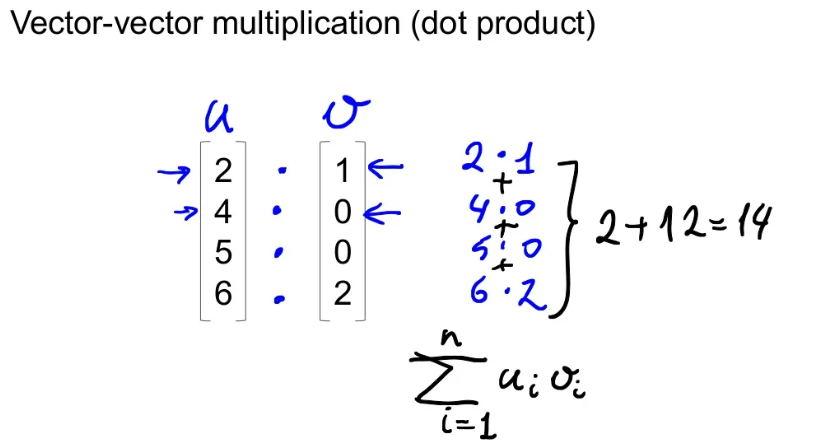

In [4]:
# shape function in python provides the size of the array
u.shape[0] 

4

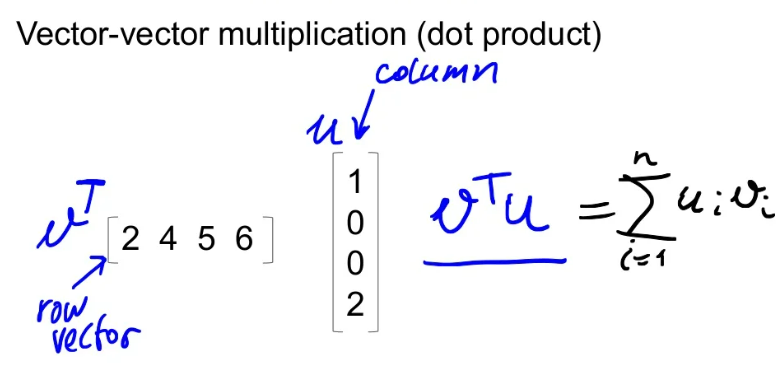

In [5]:
# let's write a function that performs vector-vector multiplication for operation performed above

def vector_vector_multiplication(u,v):
    assert u.shape[0] == v.shape[0] # make sure vectors have the same size
    
    n = u.shape[0]
    
    result = 0
    
    for i in range(n):
        result = result+u[i]*v[i] # because size of numpy arrays go from 0 to n-1
        
    return result    

In [6]:
vector_vector_multiplication(u,v)

14

In [7]:
# but numpy already has a built-in function called dot() which performs above operation
u.dot(v)

14

## Matrix-vector multiplication

In [8]:
U = np.array([
    [2,4,5,6],
    [1,2,1,2],
    [3,1,2,1],
])

In [9]:
U

array([[2, 4, 5, 6],
       [1, 2, 1, 2],
       [3, 1, 2, 1]])

In [11]:
U.shape

(3, 4)

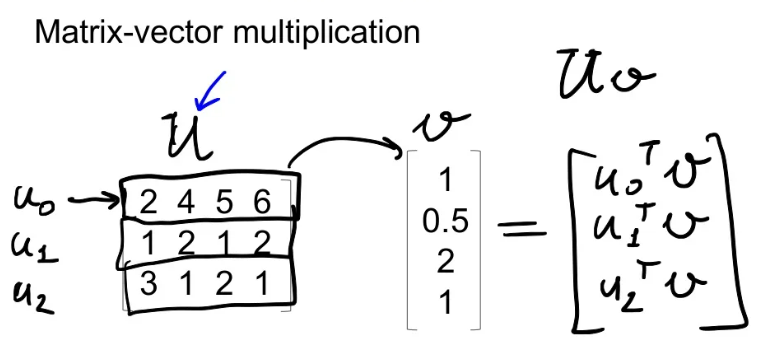

translating this operation into code as follows

In [12]:
# let's define matrix-vector multiplication function
def matrix_vector_multiplication(U,v):
    assert U.shape[1] == v.shape[0] # because the number of columns of matrix should be equal to number of vector rows
    
    num_rows = U.shape[0] # this will be dimensionality of our result
    
    result = np.zeros(num_rows)
    
    for i in range(num_rows):
        result[i] = vector_vector_multiplication (U[i],v)
        
    return result

In [13]:
matrix_vector_multiplication(U,v)

array([14.,  5.,  5.])

In [14]:
# numpy has a built-in function for matrix.vector multiplication

U.dot(v)

array([14,  5,  5])

## Matrix-matrix multiplication

In [15]:
 V = np.array([
     [1,1,2],
     [0,0.5,1],
     [0,2,1],
     [2,1,0],
 ]
 )

In [18]:
def matrix_matrix_multiplication(U,V):
    assert U.shape[1] == V.shape[0]
    
    num_rows = U.shape[0] #number of rows comes from the first dimension of U
    num_cols = V.shape[1] # columns come from second dimension of V
    
    result = np.zeros((num_rows,num_cols))
    
    for i in range(num_cols):
        vi = V[:,i]
        Uvi = matrix_vector_multiplication(U,vi)
        result[:,i] = Uvi
    return result   

In [19]:
matrix_matrix_multiplication(U,V)

array([[14. , 20. , 13. ],
       [ 5. ,  6. ,  5. ],
       [ 5. ,  8.5,  9. ]])

## Identity matrix

In [25]:
# it is a matrix with ones in diagonal side
# if an matrix is multiplied with an identitiy matrix, we get the same matrix back as a result
# numpy has a function eye which provides identity matrix
I = np.eye(3) # this creates an identity matrix of size 3

In [21]:
V

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ],
       [2. , 1. , 0. ]])

In [26]:
V.dot(I)

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ],
       [2. , 1. , 0. ]])

## Inverse

In [30]:
# only square matrix have inverse
Vs = V[[0,1,2]]
Vs

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ]])

In [33]:
# inverse of Vs using inv

Vs_inv = np.linalg.inv(Vs)
Vs_inv

array([[ 1.        , -2.        ,  0.        ],
       [ 0.        , -0.66666667,  0.66666667],
       [ 0.        ,  1.33333333, -0.33333333]])

In [34]:
# when a matrix is multiplied with its inverse, we get the Identity matrx
Vs_inv.dot(Vs)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])